In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Downloads/hocco_sales_data_23 1.csv')

df.head()

,itemid,orderdate,qty,amount
0,SFG633,01-01-2022,9.0,270.09
1,6010101,01-01-2022,6.0,408.84
2,R00010,01-01-2022,40.0,2176.20
3,R00429,01-01-2022,21.0,1387.75
4,RMD0460,01-01-2022,15.0,486.00


In [2]:
# Ensure the orderdate is in datetime format
df['orderdate'] = pd.to_datetime(df['orderdate'], format='%d-%m-%Y')

In [5]:

import matplotlib.pyplot as plt
from prophet import Prophet


def forecast_item_sales(df, itemid):
    # Filter the dataframe for the given itemid
    filtered_df = df[df['itemid'] == itemid]

    # Count the frequency of each itemid
    item_freq = df['itemid'].value_counts()

    # Get the itemid with the maximum frequency
    #max_freq_itemid = item_freq.idxmax()

    # Create a date range from the start to the end of the year
    date_range = pd.date_range(start='2022-01-01', end='2022-12-31')

    # Create a new DataFrame with all dates
    daily_data = pd.DataFrame(date_range, columns=['orderdate'])

    # Merge with the filtered data to ensure all dates are present
    daily_data = daily_data.merge(filtered_df[['orderdate', 'amount']], on='orderdate', how='left')

    # Fill NaN amounts with 0
    daily_data['amount'] = daily_data['amount'].fillna(0)

    # Add itemid column
    daily_data['itemid'] = itemid

    # Split the daily_data into train and test sets
    train_data = daily_data[(daily_data['orderdate'] >= '2022-01-01') & (daily_data['orderdate'] <= '2022-11-30')]
    test_data = daily_data[(daily_data['orderdate'] >= '2022-12-01') & (daily_data['orderdate'] <= '2022-12-31')]

    # Prepare the train data for Prophet
    prophet_train_data = train_data.rename(columns={'orderdate': 'ds', 'amount': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(prophet_train_data)

    # Create a DataFrame for future dates (31 days for December)
    future_dates = model.make_future_dataframe(periods=31)

    # Predict the future values
    forecast = model.predict(future_dates)

    # Filter the forecast to get predictions for December 2022
    december_forecast = forecast[(forecast['ds'] >= '2022-12-01') & (forecast['ds'] <= '2022-12-31')]

    # Merge with the actual amounts for December 2022
    comparison_df = december_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(
        test_data[['orderdate', 'amount']],
        left_on='ds',
        right_on='orderdate',
        how='left'
    )

    # Rename 'amount' to 'y'
    comparison_df.rename(columns={'amount': 'y'}, inplace=True)

    # Drop the 'orderdate' column
    comparison_df.drop(columns=['orderdate'], inplace=True)

    print(comparison_df)

    # Plotting the comparison
    plt.figure(figsize=(12, 6))

    # Plot predicted values
    plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Predicted Amount', color='blue', marker='o')

    # Plot actual values
    plt.plot(comparison_df['ds'], comparison_df['y'], label='Actual Amount', color='red', marker='x')

    # Fill between the forecast uncertainty
    plt.fill_between(comparison_df['ds'], comparison_df['yhat_lower'], comparison_df['yhat_upper'], 
                     color='blue', alpha=0.2, label='Confidence Interval')

    # Customize the plot
    plt.title(f'Predicted vs Actual Amount for {itemid} in December 2022')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    # Show the plot
    plt.tight_layout()
    plt.show()




11:01:10 - cmdstanpy - INFO - Chain [1] start processing
11:01:10 - cmdstanpy - INFO - Chain [1] done processing


           ds       yhat  yhat_lower  yhat_upper       y
0  2022-12-01  87.625745  -10.072305  183.545949   30.01
1  2022-12-02  51.250137  -42.607119  139.907122    0.00
2  2022-12-03  40.891740  -55.520327  137.333471    0.00
3  2022-12-04  37.965130  -57.449714  131.891263   30.01
4  2022-12-05  60.769056  -30.374145  159.972859    0.00
5  2022-12-06  -7.643542 -101.258881   84.892377    0.00
6  2022-12-07  44.872181  -47.035388  136.109822   30.01
7  2022-12-08  86.831946   -6.499877  176.691491  120.04
8  2022-12-09  50.456339  -34.639065  143.857883   90.03
9  2022-12-10  40.097941  -57.350569  129.483538    0.00
10 2022-12-11  37.171331  -58.185288  126.246335    0.00
11 2022-12-12  59.975258  -28.635480  155.457403    0.00
12 2022-12-13  -8.437341  -97.557386   84.086340   90.03
13 2022-12-14  44.078382  -45.960096  139.460715   30.01
14 2022-12-15  86.038147   -6.907298  179.929713  150.05
15 2022-12-16  49.662540  -44.659127  145.772346   30.01
16 2022-12-17  39.304142  -57.3

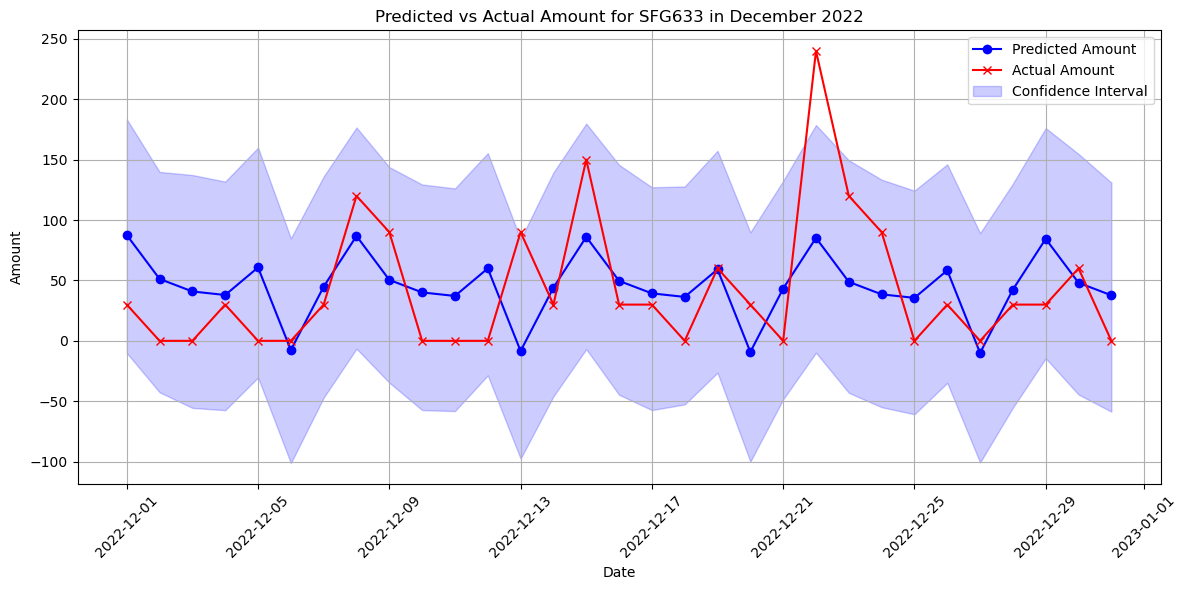

11:01:11 - cmdstanpy - INFO - Chain [1] start processing
11:01:11 - cmdstanpy - INFO - Chain [1] done processing


           ds          yhat    yhat_lower    yhat_upper          y
0  2022-12-01  13307.617393 -18318.722052  46303.082809    3592.80
1  2022-12-02  15148.987280 -18789.685998  47806.077300   31631.04
2  2022-12-03  27269.542243  -3521.688194  60201.569504    1796.40
3  2022-12-04   5434.527128 -29617.054321  38023.343650       0.00
4  2022-12-05  17020.893505 -15062.983567  49978.004560   30634.74
5  2022-12-06  19264.360092 -14052.081470  53330.989658   22746.60
6  2022-12-07  13544.471001 -18771.554921  46713.981154    5698.29
7  2022-12-08  13447.686903 -19210.873215  44800.654788   16167.60
8  2022-12-09  15289.056791 -16196.601855  47243.220324    4460.55
9  2022-12-10  27409.611754  -4723.252800  61186.953586   56243.16
10 2022-12-11   5574.596639 -28802.395906  37777.187930       0.00
11 2022-12-12  17160.963016 -18744.508350  50576.068504   25549.56
12 2022-12-13  19404.429602 -13574.614595  52455.065733   16944.24
13 2022-12-14  13684.540511 -18520.645816  45185.964026    538

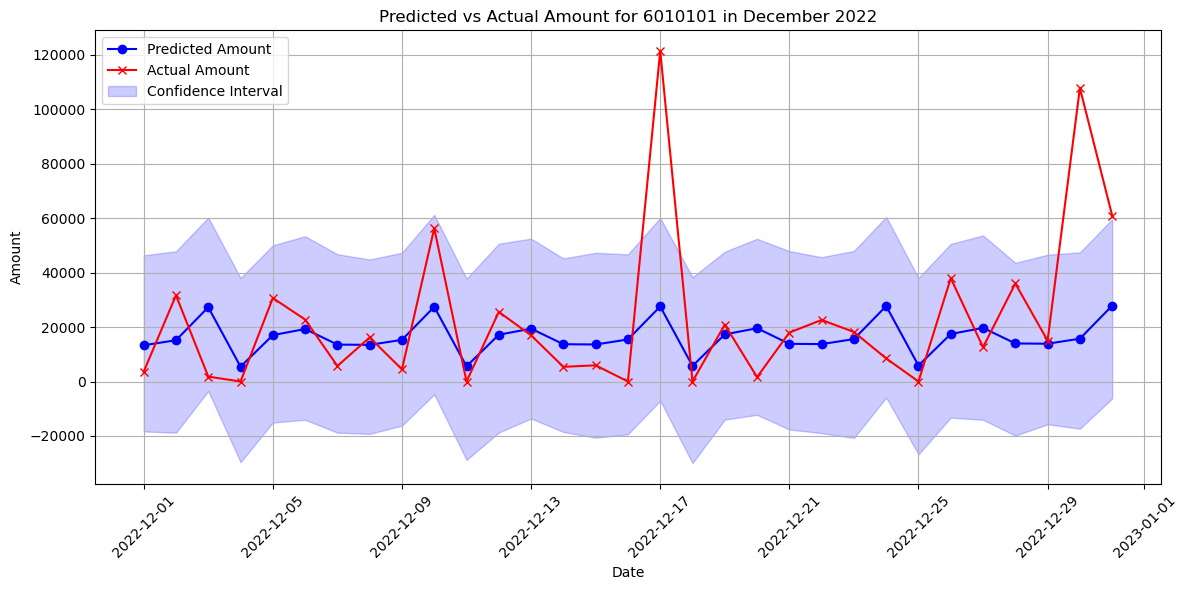

11:01:12 - cmdstanpy - INFO - Chain [1] start processing
11:01:12 - cmdstanpy - INFO - Chain [1] done processing


           ds         yhat   yhat_lower   yhat_upper       y
0  2022-12-01  3501.718459  2782.369362  4284.170728  3224.0
1  2022-12-02  2729.035258  2023.758380  3395.902520  2542.0
2  2022-12-03  2174.752251  1373.277123  2890.674934   992.0
3  2022-12-04  2259.579478  1565.401073  3004.800944  2108.0
4  2022-12-05  2720.555816  1999.936791  3488.533072  3968.0
5  2022-12-06   659.188811  -100.133848  1370.059660    62.0
6  2022-12-07  2782.900125  2021.632309  3484.565514  2356.0
7  2022-12-08  3508.395761  2763.996169  4247.209660  3224.0
8  2022-12-09  2735.712560  2009.255720  3506.267063  1984.0
9  2022-12-10  2181.429554  1481.286165  2880.812136  1488.0
10 2022-12-11  2266.256780  1532.187011  2966.187658  2418.0
11 2022-12-12  2727.233119  2045.824004  3438.249450  1178.0
12 2022-12-13   665.866114   -79.085518  1414.627544   310.0
13 2022-12-14  2789.577427  2049.409832  3561.777006  2232.0
14 2022-12-15  3515.073063  2774.131526  4209.560546  3844.0
15 2022-12-16  2742.3898

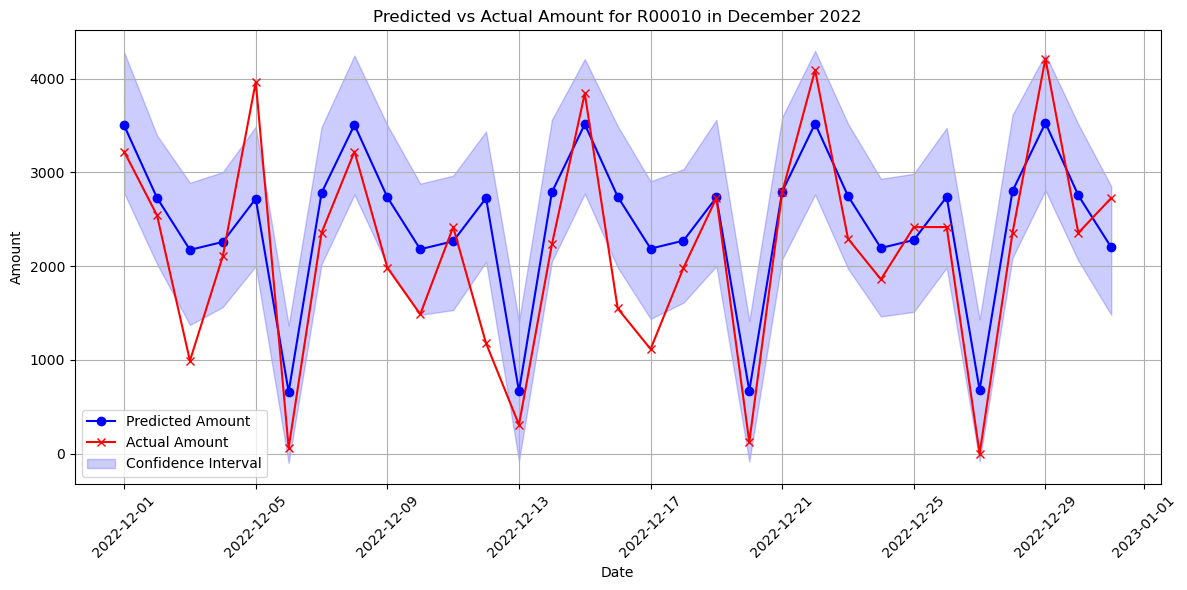

11:01:13 - cmdstanpy - INFO - Chain [1] start processing
11:01:13 - cmdstanpy - INFO - Chain [1] done processing


           ds         yhat   yhat_lower   yhat_upper       y
0  2022-12-01  2401.175640  1404.321304  3331.391028  2574.0
1  2022-12-02  1204.678282   223.029740  2114.561677  1215.5
2  2022-12-03  1014.362090    23.994787  1942.352039   715.0
3  2022-12-04   756.933078  -171.103734  1686.850999   715.0
4  2022-12-05  2241.994331  1335.812001  3187.660502  4075.5
5  2022-12-06   664.654686  -276.602081  1592.737222     0.0
6  2022-12-07  1136.763283   134.749219  2016.659435  1072.5
7  2022-12-08  2401.595143  1458.684345  3393.360077  2288.0
8  2022-12-09  1205.097784   253.437745  2269.482562   786.5
9  2022-12-10  1014.781593   113.337922  1925.388351   786.5
10 2022-12-11   757.352580  -149.094374  1723.486491   929.5
11 2022-12-12  2242.413833  1205.328567  3191.119020  2359.5
12 2022-12-13   665.074189  -267.689776  1736.076790   143.0
13 2022-12-14  1137.182786   195.537043  2031.927105   214.5
14 2022-12-15  2402.014645  1476.315516  3345.390272  2574.0
15 2022-12-16  1205.5172

KeyboardInterrupt: 

In [7]:
# Iterate over each unique itemid in the dataset
for itemid in df['itemid'].unique():
    forecast_item_sales(df, itemid)


## JANUARY FORECAST

In [12]:


def forecast_january_sales(df, itemid):
    # Filter data for the given itemid from January 2022 to December 2022
    jan_data = df[(df['itemid'] == itemid) & 
                   (df['orderdate'] >= '2022-01-01') & 
                   (df['orderdate'] <= '2022-12-31')]

    # Prepare the data for Prophet
    prophet_jan_data = jan_data.rename(columns={'orderdate': 'ds', 'amount': 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(prophet_jan_data)

    # Create a DataFrame for future dates (31 days for January 2023)
    future_dates = model.make_future_dataframe(periods=31, freq='D')

    # Predict the future values
    forecast = model.predict(future_dates)

    # Filter the forecast to get predictions for January 2023
    january_forecast = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-01-31')]

    # Display the predictions for January
    print(f"Predictions for itemid {itemid}:")
    print(january_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Plotting the January 2023 predictions
    plt.figure(figsize=(12, 6))

    # Plot predicted values
    plt.plot(january_forecast['ds'], january_forecast['yhat'], label='Predicted Amount', color='blue', marker='o')

    # Fill between the forecast uncertainty
    plt.fill_between(january_forecast['ds'], january_forecast['yhat_lower'], january_forecast['yhat_upper'], 
                     color='blue', alpha=0.2, label='Confidence Interval')

    # Customize the plot
    plt.title(f'Predicted Amount for January 2023 - Item ID: {itemid}')
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    # Show the plot
    plt.tight_layout()
    plt.show()



11:01:37 - cmdstanpy - INFO - Chain [1] start processing
11:01:37 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid SFG633:
            ds        yhat  yhat_lower  yhat_upper
272 2023-01-01   56.928320  -37.153160  156.348688
273 2023-01-02   73.126707  -18.776058  158.749310
274 2023-01-03   33.799434  -60.685737  124.343243
275 2023-01-04   56.827175  -41.242670  158.150431
276 2023-01-05  100.867202    2.968003  208.383152
277 2023-01-06   71.653454  -21.545829  172.674844
278 2023-01-07   49.908556  -52.080124  145.079180
279 2023-01-08   56.329549  -43.037684  154.269649
280 2023-01-09   72.527936  -24.650198  172.306423
281 2023-01-10   33.200663  -58.940724  133.920558
282 2023-01-11   56.228404  -44.031374  165.144973
283 2023-01-12  100.268431    0.500570  193.384434
284 2023-01-13   71.054683  -26.063391  175.725085
285 2023-01-14   49.309785  -51.594528  157.057700
286 2023-01-15   55.730779  -43.984389  159.838610
287 2023-01-16   71.929165  -25.923445  173.256308
288 2023-01-17   32.601892  -70.086178  137.511755
289 2023-01-18   55.629634  -32.240989  155.521565


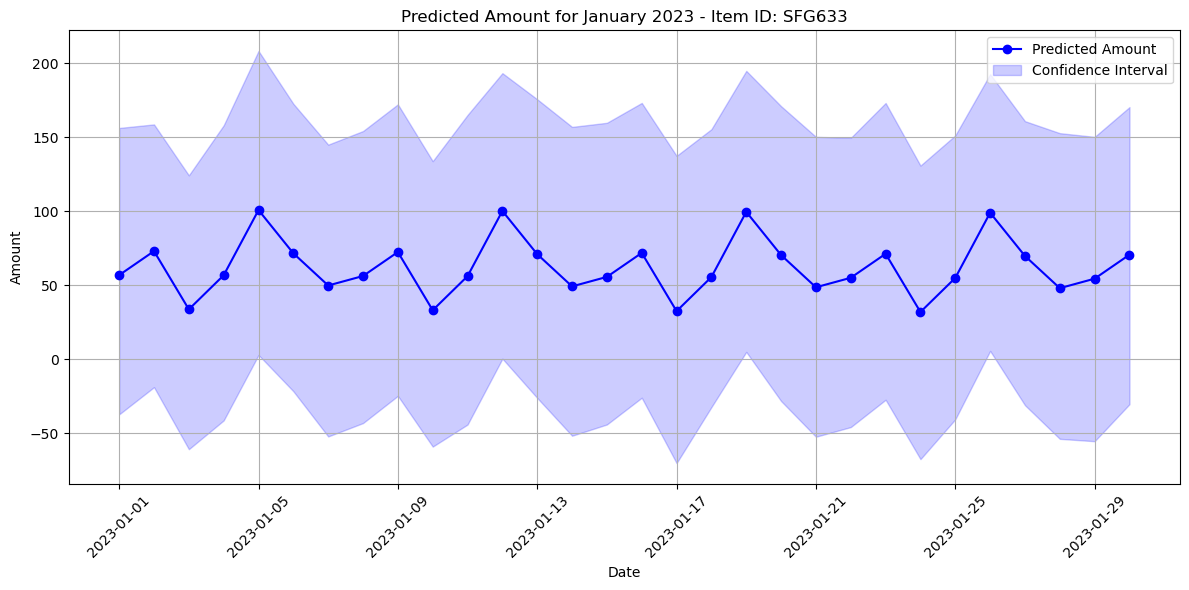

11:01:38 - cmdstanpy - INFO - Chain [1] start processing
11:01:38 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid 6010101:
            ds          yhat    yhat_lower     yhat_upper
270 2023-01-01  62699.225277  26351.889125   97124.973109
271 2023-01-02  24762.814870 -14332.240920   62729.522350
272 2023-01-03  27270.731751  -9332.036018   61925.505250
273 2023-01-04  20073.653738 -17181.292806   56866.450288
274 2023-01-05  19555.086172 -20275.732908   56978.237434
275 2023-01-06  25236.868988 -13166.516300   62205.702736
276 2023-01-07  37242.852407    558.172990   74392.268353
277 2023-01-08  62998.078526  26406.169768   99018.280056
278 2023-01-09  25061.668119 -11246.741038   59483.383327
279 2023-01-10  27569.585000  -8021.204719   63887.499947
280 2023-01-11  20372.506987 -15304.554897   58261.451201
281 2023-01-12  19853.939421 -17800.805532   59217.144582
282 2023-01-13  25535.722237  -8964.171880   64497.929795
283 2023-01-14  37541.705656   -296.817005   74301.969063
284 2023-01-15  63296.931775  30086.915966  101535.934189
285 2023-01-16  25360.521368 -10274.5081

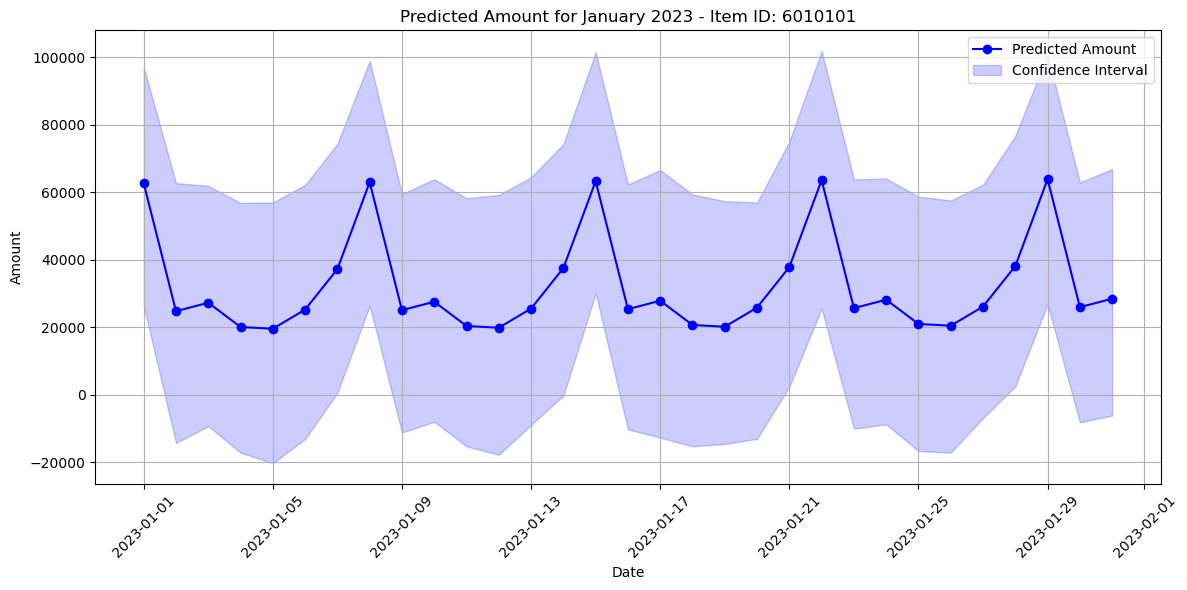

11:01:39 - cmdstanpy - INFO - Chain [1] start processing
11:01:39 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid R00010:
            ds         yhat   yhat_lower   yhat_upper
350 2023-01-01  2161.251472  1434.132065  2911.739546
351 2023-01-02  2612.513922  1886.379847  3353.671683
352 2023-01-03   708.128659   -40.878224  1453.915786
353 2023-01-04  2657.804300  1899.010126  3394.142765
354 2023-01-05  3430.454351  2642.553778  4126.759407
355 2023-01-06  2579.271002  1854.134411  3282.336656
356 2023-01-07  2029.226370  1345.980992  2759.150126
357 2023-01-08  2160.223767  1459.979814  2868.408752
358 2023-01-09  2611.486217  1899.826873  3330.089460
359 2023-01-10   707.100954   -29.808321  1455.273840
360 2023-01-11  2656.776595  1872.403525  3378.101711
361 2023-01-12  3429.426646  2688.641617  4199.085234
362 2023-01-13  2578.243297  1846.520463  3260.217851
363 2023-01-14  2028.198666  1307.393118  2746.040419
364 2023-01-15  2159.196062  1426.644575  2833.046843
365 2023-01-16  2610.458512  1893.230690  3324.099389
366 2023-01-17   706.073249   -63.690435  1431.7956

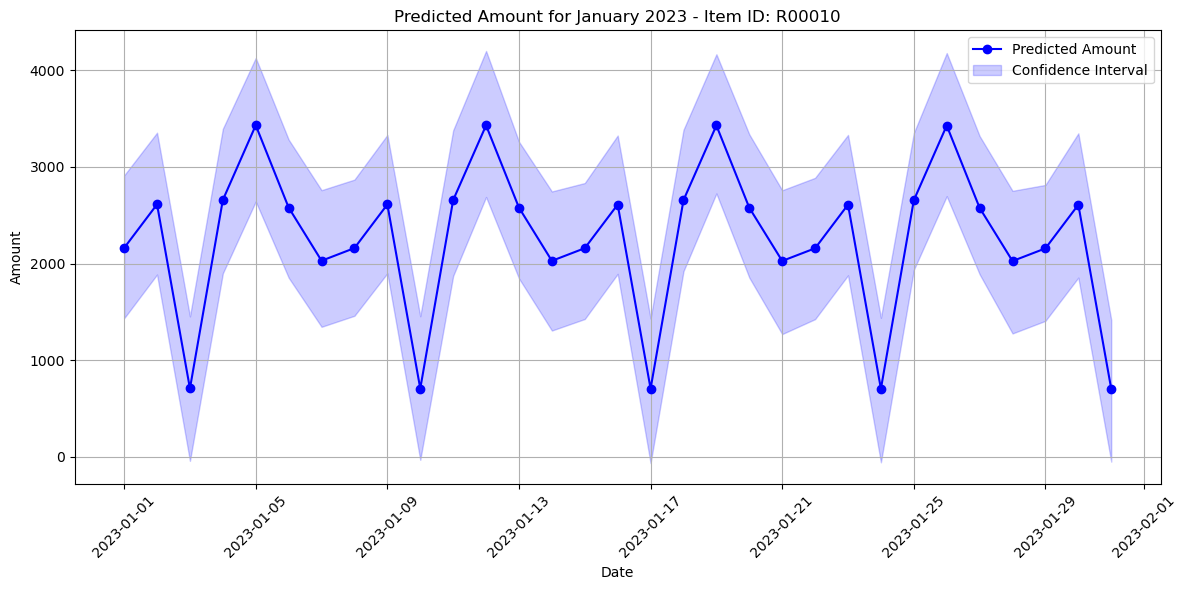

11:01:39 - cmdstanpy - INFO - Chain [1] start processing
11:01:40 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid R00429:
            ds         yhat   yhat_lower   yhat_upper
345 2023-01-01   803.419815  -246.757728  1699.394853
346 2023-01-02  2324.116141  1360.690620  3292.488434
347 2023-01-03  1027.908665   106.220972  1929.486786
348 2023-01-04  1112.804728   106.659446  1972.705877
349 2023-01-05  2448.793195  1482.728203  3465.780188
350 2023-01-06  1223.870085   300.336884  2140.762144
351 2023-01-07  1016.293624   123.425680  1960.815269
352 2023-01-08   804.575992  -183.774458  1782.881489
353 2023-01-09  2325.272317  1325.014825  3181.387455
354 2023-01-10  1029.064842   104.035258  1983.458189
355 2023-01-11  1113.960905   167.917463  2105.917003
356 2023-01-12  2449.949371  1451.275440  3392.051782
357 2023-01-13  1225.026262   275.631428  2092.104913
358 2023-01-14  1017.449800    78.061012  1981.135090
359 2023-01-15   805.732168  -183.517594  1756.094074
360 2023-01-16  2326.428494  1367.643660  3232.926646
361 2023-01-17  1030.221018    85.866219  1886.9035

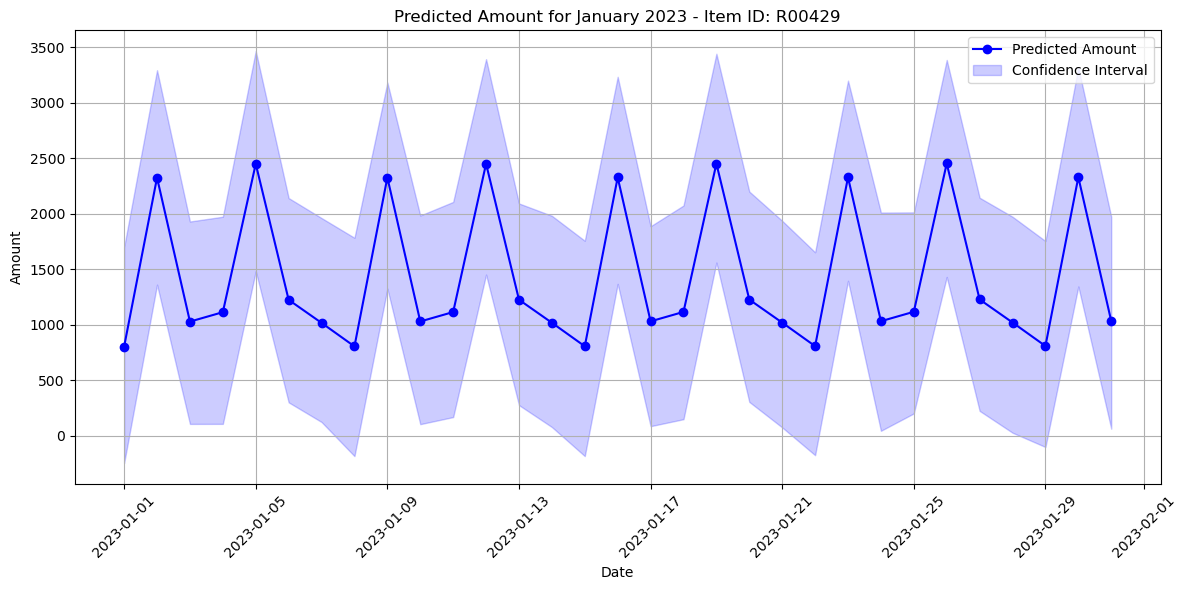

11:01:40 - cmdstanpy - INFO - Chain [1] start processing
11:01:40 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid RMD0460:
            ds         yhat  yhat_lower   yhat_upper
319 2023-01-01   191.260499 -283.872900   663.712273
320 2023-01-02   420.894912  -84.527230   851.589390
321 2023-01-03   139.658319 -318.341659   624.093829
322 2023-01-04   329.483329 -130.540416   756.578051
323 2023-01-05  1171.791766  686.851405  1651.011739
324 2023-01-06   357.257343 -139.891255   811.542814
325 2023-01-07   267.838128 -242.918657   745.075411
326 2023-01-08   185.657971 -275.577019   655.356849
327 2023-01-09   415.292384  -66.297309   933.513178
328 2023-01-10   134.055790 -297.338868   595.524120
329 2023-01-11   323.880801 -159.384030   782.295292
330 2023-01-12  1166.189238  679.307713  1639.756089
331 2023-01-13   351.654814  -94.303637   842.273784
332 2023-01-14   262.235600 -201.427718   731.450622
333 2023-01-15   180.055443 -292.945750   626.945151
334 2023-01-16   409.689855  -34.611284   864.874088
335 2023-01-17   128.453262 -343.852419   647.218175
336 2023-01-18

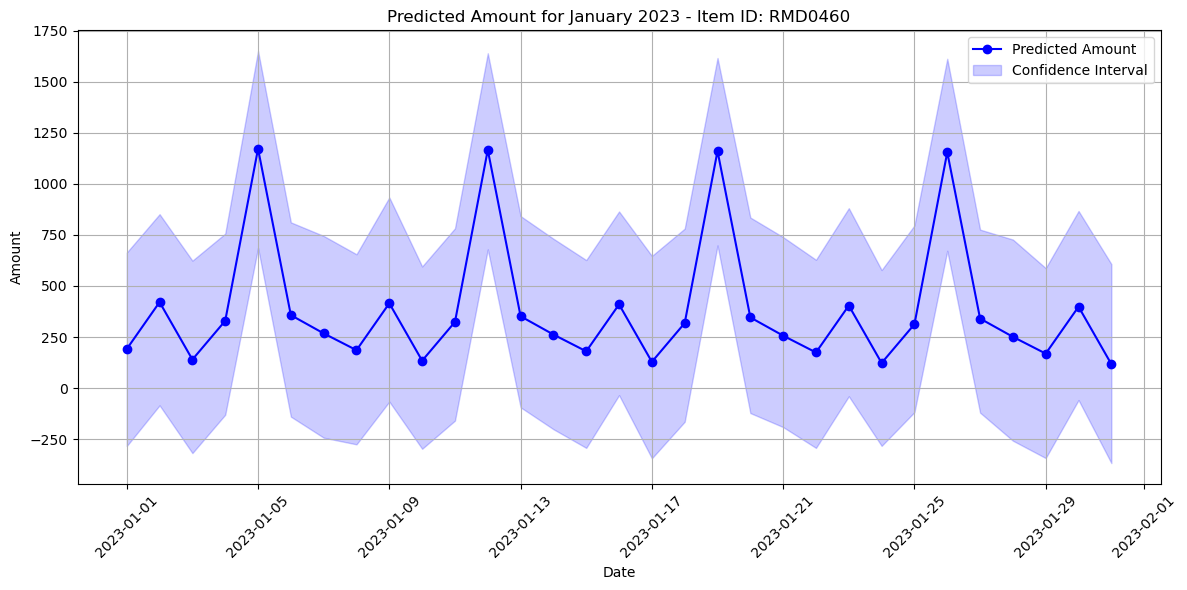

11:01:41 - cmdstanpy - INFO - Chain [1] start processing
11:01:42 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid SFG596:
           ds         yhat  yhat_lower   yhat_upper
15 2023-01-01   678.054671  274.027171  1086.140082
16 2023-01-02   943.825419  550.832761  1330.308551
17 2023-01-03    37.643626 -383.109751   449.004023
18 2023-01-04    38.802005 -360.832303   473.595281
19 2023-01-05  1095.851635  683.388978  1550.670534
20 2023-01-06   944.755218  530.478812  1338.968375
21 2023-01-07  1203.236870  780.584779  1624.919822
22 2023-01-08   686.181167  241.951077  1123.737345
23 2023-01-09   951.951916  549.405761  1374.062545
24 2023-01-10    45.770122 -359.576906   455.751533
25 2023-01-11    46.928502 -374.749393   458.233550
26 2023-01-12  1103.978132  704.273895  1513.530259
27 2023-01-13   952.881714  519.250898  1369.447645
28 2023-01-14  1211.363366  814.682341  1657.702669
29 2023-01-15   694.307663  284.805431  1121.720207
30 2023-01-16   960.078412  555.746514  1377.731366
31 2023-01-17    53.896618 -381.479519   467.109917
32 2023-01-18    55.054998 -383.8

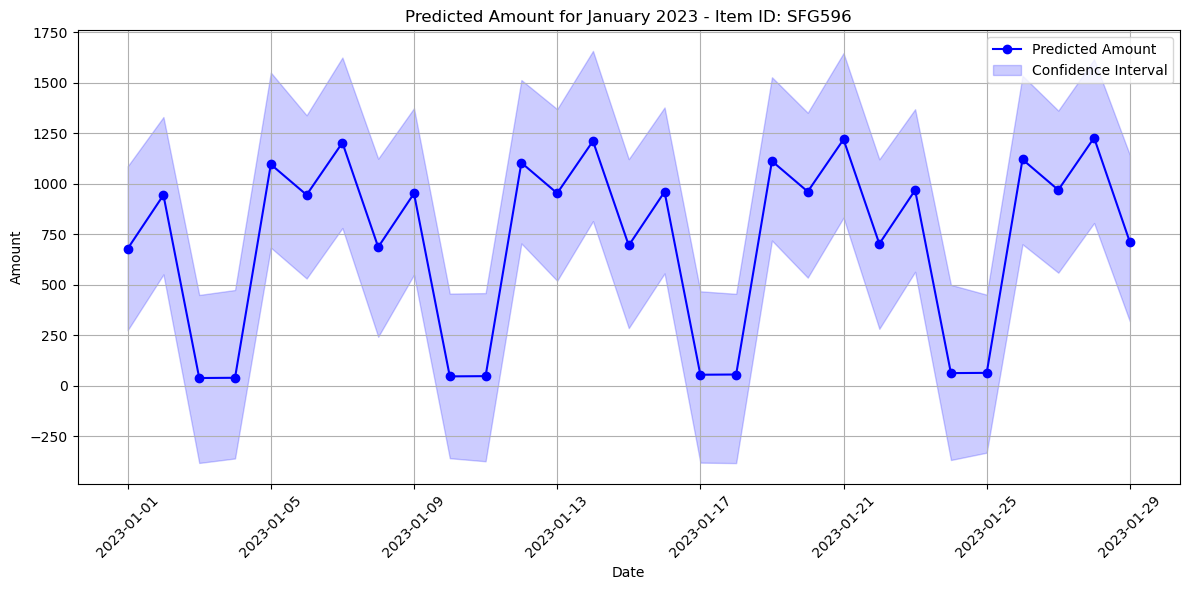

11:01:43 - cmdstanpy - INFO - Chain [1] start processing
11:01:43 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid A00123:
            ds         yhat   yhat_lower   yhat_upper
353 2023-01-01  1458.674774   858.791547  2109.772113
354 2023-01-02  2774.921634  2107.413938  3376.640336
355 2023-01-03   654.014155    53.271924  1303.031335
356 2023-01-04  2076.041312  1427.965364  2719.176695
357 2023-01-05  3171.710714  2546.669026  3795.094423
358 2023-01-06  1773.159337  1143.016816  2377.242561
359 2023-01-07  2104.998121  1532.087065  2743.355275
360 2023-01-08  1459.436248   809.067312  2068.070670
361 2023-01-09  2775.683108  2178.626752  3368.813267
362 2023-01-10   654.775630    18.884604  1284.518907
363 2023-01-11  2076.802786  1438.222132  2734.406354
364 2023-01-12  3172.472188  2530.229038  3812.232847
365 2023-01-13  1773.920811  1142.563751  2348.656040
366 2023-01-14  2105.759596  1476.257562  2730.709904
367 2023-01-15  1460.197723   855.400408  2051.908151
368 2023-01-16  2776.444582  2163.955608  3341.903346
369 2023-01-17   655.537104    29.468404  1251.2164

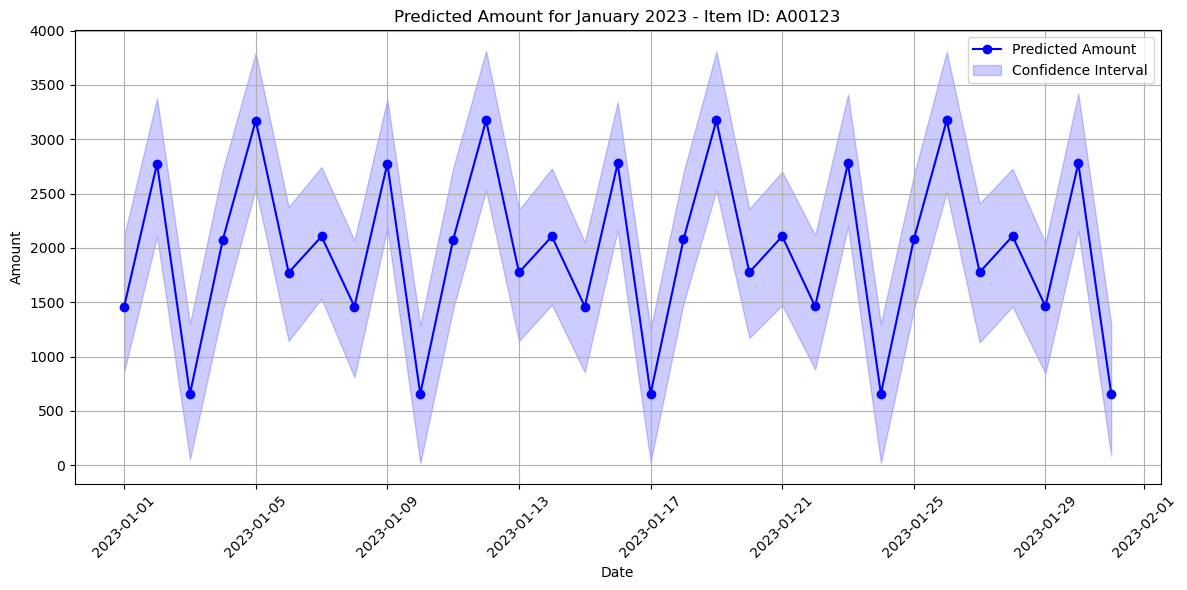

11:01:44 - cmdstanpy - INFO - Chain [1] start processing
11:01:44 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid SFG577:
            ds          yhat   yhat_lower    yhat_upper
200 2023-01-01   5237.244175 -1399.938656  11754.306128
201 2023-01-02   9104.810676  2093.131623  15917.065157
202 2023-01-03   4934.606696 -1954.068546  11441.686884
203 2023-01-04   5670.385268  -757.515920  12513.728919
204 2023-01-05  13965.081689  7246.598464  20682.294565
205 2023-01-06  10599.512117  3939.750135  17371.191290
206 2023-01-07   8075.499957  1100.488496  15035.145532
207 2023-01-08   5284.062418 -1449.625998  12219.217547
208 2023-01-09   9151.628919  2011.929319  16356.433624
209 2023-01-10   4981.424939 -1843.656330  11694.304618
210 2023-01-11   5717.203511  -847.952799  12151.453050
211 2023-01-12  14011.899932  6844.764639  20631.055371
212 2023-01-13  10646.330360  4203.175527  17342.491795
213 2023-01-14   8122.318200   547.352190  14655.333410
214 2023-01-15   5330.880661 -1582.307937  12180.279025
215 2023-01-16   9198.447162  2205.411370  16553.172250
216 2023-01-17   

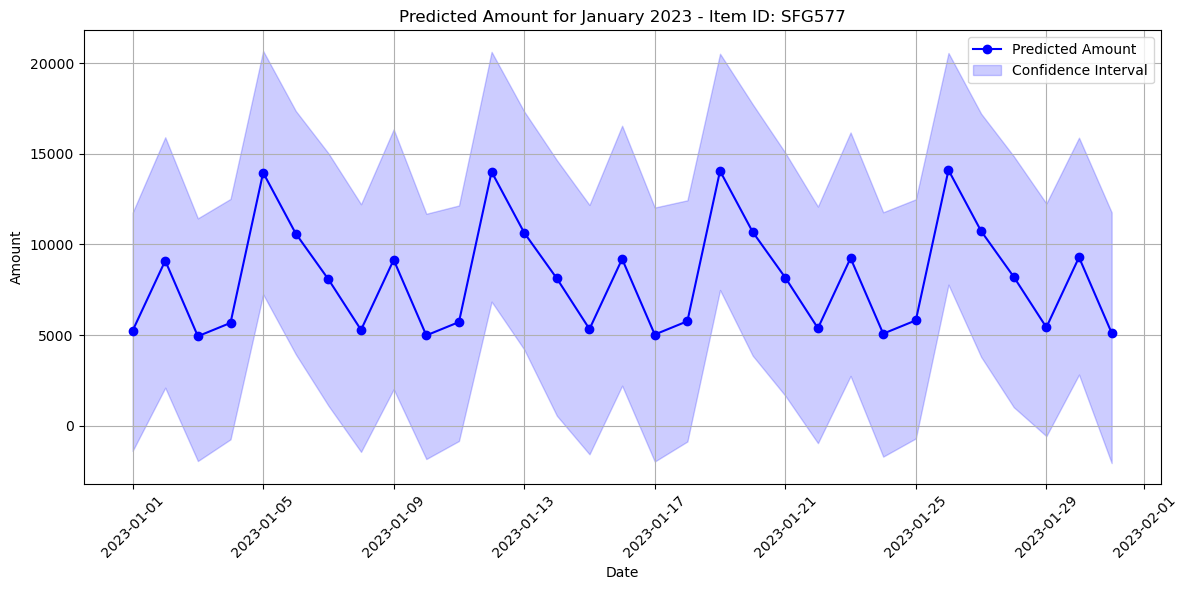

11:01:44 - cmdstanpy - INFO - Chain [1] start processing
11:01:45 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid R00274:
            ds         yhat   yhat_lower   yhat_upper
348 2023-01-01  2614.743027   540.520583  4543.156251
349 2023-01-02  4913.781036  2846.439703  6765.281648
350 2023-01-03  1402.158117  -801.753317  3316.318971
351 2023-01-04  3099.226063  1086.236473  5173.421163
352 2023-01-05  7327.514545  5232.738870  9264.998008
353 2023-01-06  3530.506408  1527.876609  5664.214870
354 2023-01-07  3075.664957  1091.302640  4979.858928
355 2023-01-08  2599.362619   618.241486  4483.986153
356 2023-01-09  4898.400628  2878.875211  6884.264571
357 2023-01-10  1386.777708  -812.592196  3309.635348
358 2023-01-11  3083.845654  1076.554588  5140.339327
359 2023-01-12  7312.134137  5360.764416  9485.727157
360 2023-01-13  3515.126000  1336.541409  5502.078293
361 2023-01-14  3060.284549   987.409708  5063.431801
362 2023-01-15  2583.982211   442.079750  4662.118744
363 2023-01-16  4883.020220  2864.300678  6890.698329
364 2023-01-17  1371.397300  -559.745784  3496.6605

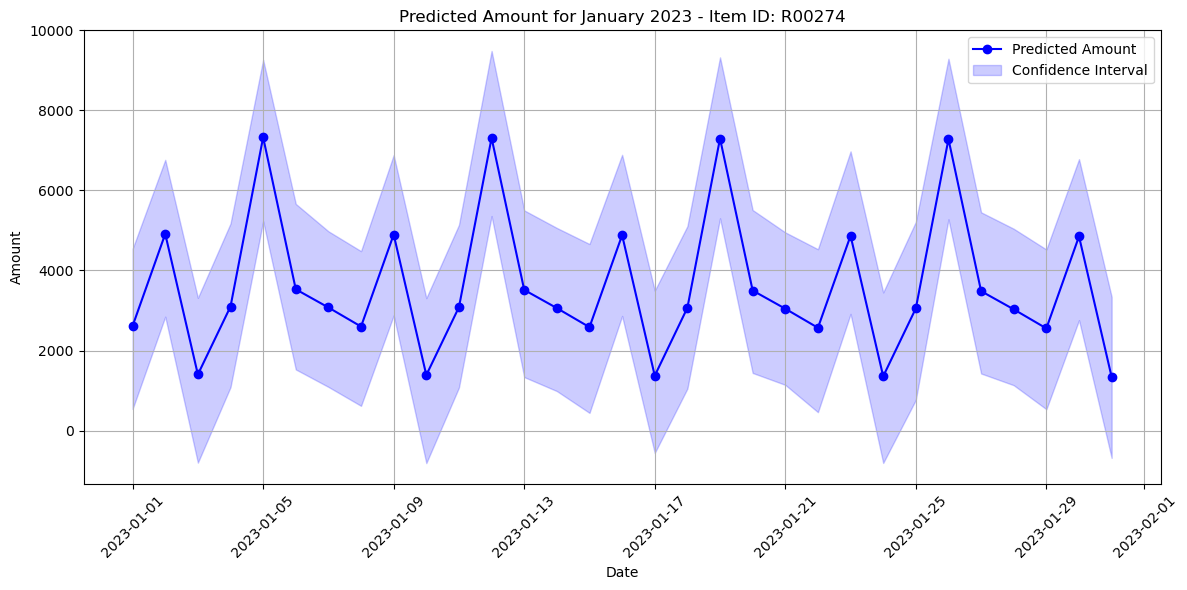

11:01:46 - cmdstanpy - INFO - Chain [1] start processing
11:01:46 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid SFG081:
           ds         yhat   yhat_lower   yhat_upper
20 2023-01-01  1880.692847  1443.211500  2251.647038
21 2023-01-02  1465.552142  1058.697273  1831.682585
22 2023-01-03   487.564628   109.919337   900.580190
23 2023-01-04   490.134814   109.773003   880.269069
24 2023-01-05  1728.754338  1318.351146  2146.499625
25 2023-01-06  1528.001131  1152.389217  1927.359145
26 2023-01-07  2068.246026  1680.512860  2457.455197
27 2023-01-08  1898.688279  1485.187125  2266.973412
28 2023-01-09  1483.547574  1086.753132  1887.107839
29 2023-01-10   505.560060   117.401139   877.340095
30 2023-01-11   508.130246   106.275575   891.755695
31 2023-01-12  1746.749770  1342.507324  2175.585374
32 2023-01-13  1545.996563  1133.834779  1937.773500
33 2023-01-14  2086.241458  1686.057304  2470.752123
34 2023-01-15  1916.683710  1519.616258  2274.151833
35 2023-01-16  1501.543005  1127.697118  1891.838161
36 2023-01-17   523.555492   132.024117   940.595108
37 2023-01-18  

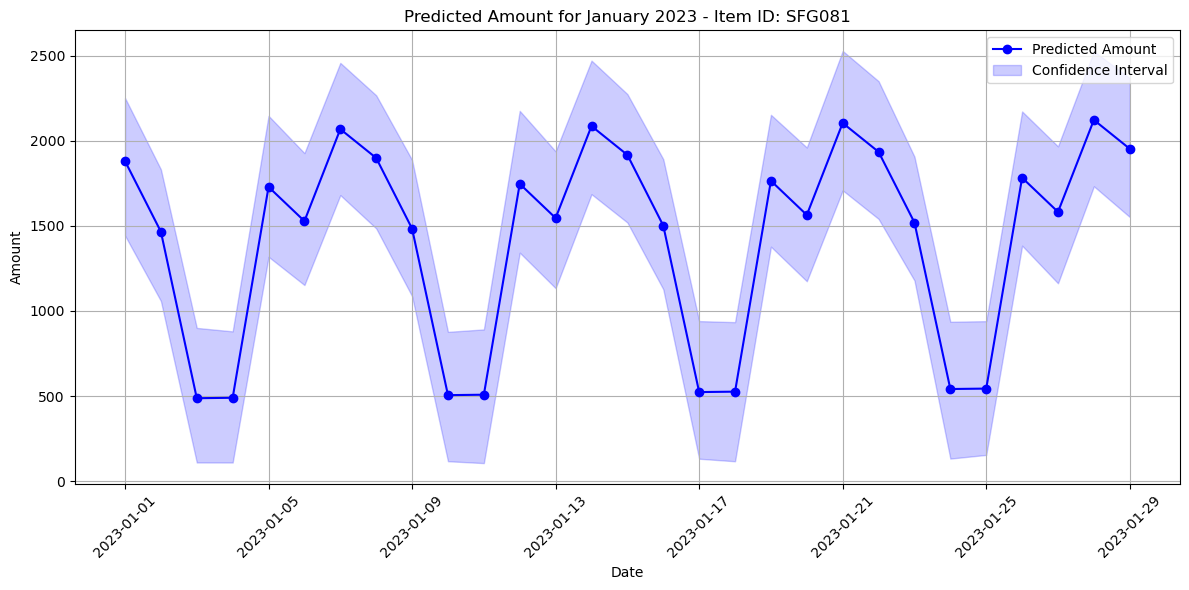

11:01:46 - cmdstanpy - INFO - Chain [1] start processing
11:01:47 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid R00829:
            ds        yhat  yhat_lower  yhat_upper
204 2023-01-01  237.817903   25.502561  447.013751
205 2023-01-02  269.073335   60.816812  470.327504
206 2023-01-03  209.373448   20.416121  422.013976
207 2023-01-04  211.374086   10.698676  427.930689
208 2023-01-05  274.446370   73.030703  485.079843
209 2023-01-06  280.069393   80.854021  479.199802
210 2023-01-07  241.013684   50.850158  437.092090
211 2023-01-08  238.453815   42.255719  429.411864
212 2023-01-09  269.709247   65.777080  458.622003
213 2023-01-10  210.009360   10.653424  406.480905
214 2023-01-11  212.009998   -7.348030  393.365654
215 2023-01-12  275.082282   69.416888  464.506739
216 2023-01-13  280.705306   84.228221  481.146912
217 2023-01-14  241.649596   40.777174  440.555458
218 2023-01-15  239.089727   53.665449  444.714391
219 2023-01-16  270.345160   73.262980  485.722029
220 2023-01-17  210.645272   15.802792  412.763558
221 2023-01-18  212.645910   16.797599  403.522723


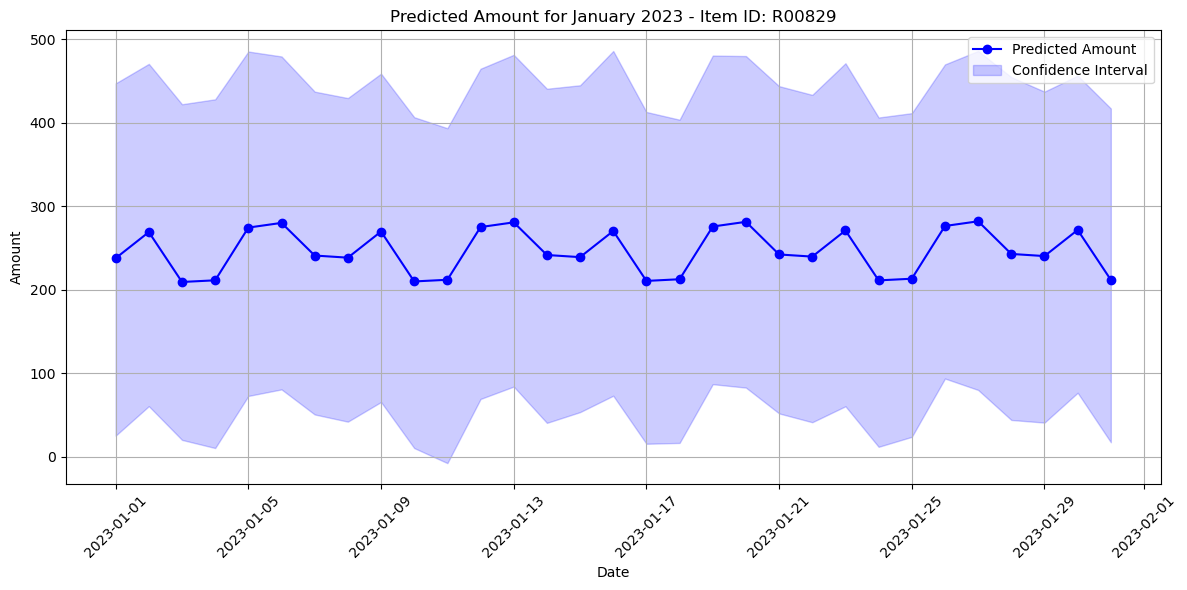

11:01:48 - cmdstanpy - INFO - Chain [1] start processing
11:01:48 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid PMD0149:
Empty DataFrame
Columns: [ds, yhat, yhat_lower, yhat_upper]
Index: []


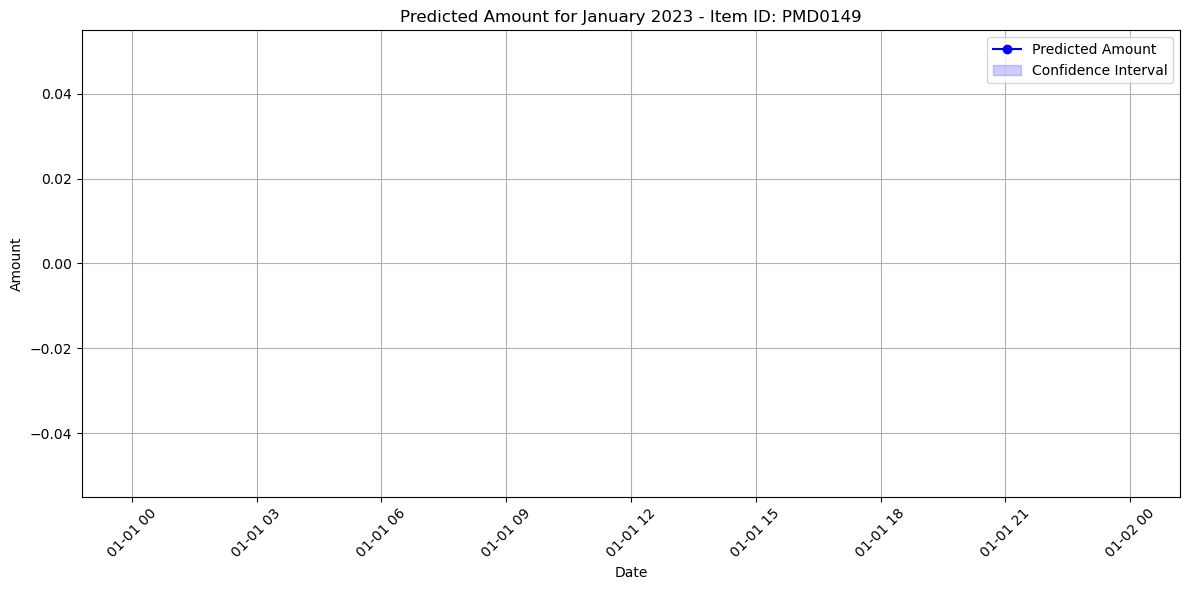

11:01:48 - cmdstanpy - INFO - Chain [1] start processing
11:01:48 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid RMD0392:
            ds          yhat    yhat_lower    yhat_upper
341 2023-01-01   6527.351020    817.507620  12313.474610
342 2023-01-02  15745.315206  10403.225745  22023.129171
343 2023-01-03   4763.401252   -991.519177  10217.759336
344 2023-01-04   7582.621860   1416.077198  13177.470774
345 2023-01-05  17991.200812  12541.637761  23242.014851
346 2023-01-06   7528.743227   2395.485524  13290.092303
347 2023-01-07  10009.925740   4300.080914  15774.464477
348 2023-01-08   6526.921816   1210.910676  12188.323299
349 2023-01-09  15744.886003   9698.793705  21285.036570
350 2023-01-10   4762.972048   -632.963193  10382.863971
351 2023-01-11   7582.192656   1873.743131  13381.497835
352 2023-01-12  17990.771609  12047.995186  23501.063864
353 2023-01-13   7528.314024   2201.148111  12767.095662
354 2023-01-14  10009.496537   4324.866682  15956.337312
355 2023-01-15   6526.492613    919.646423  12174.907056
356 2023-01-16  15744.456799  10191.262824  21133.733163

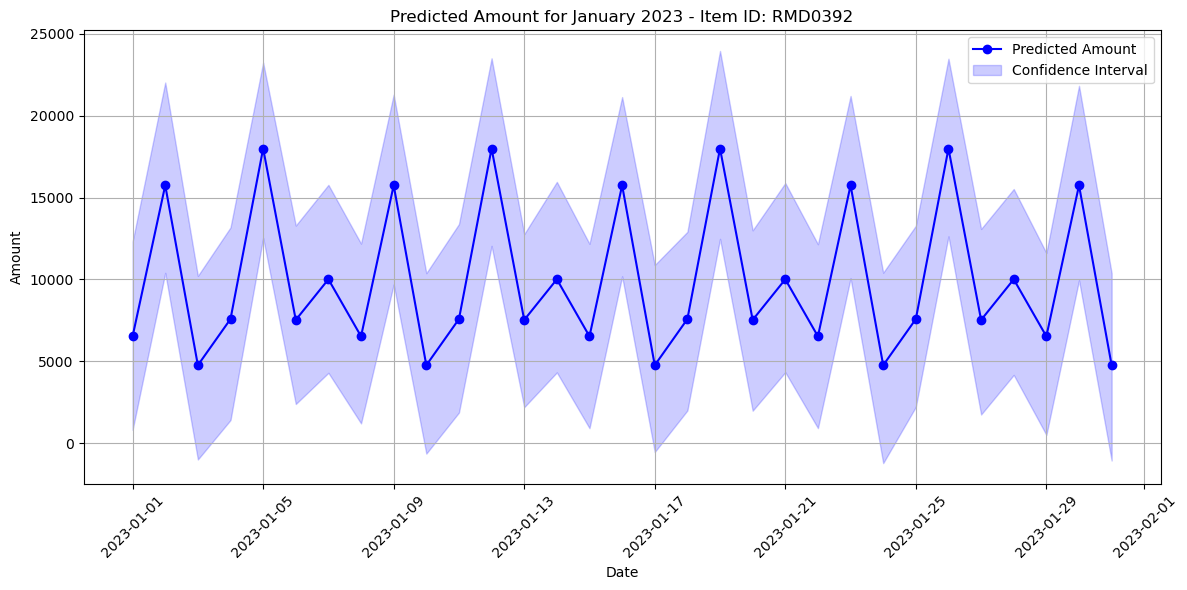

11:01:49 - cmdstanpy - INFO - Chain [1] start processing
11:01:49 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid A00170:
            ds        yhat  yhat_lower   yhat_upper
152 2023-01-01  315.699059 -256.479081   894.434692
153 2023-01-02  298.256153 -254.160180   857.101593
154 2023-01-03  337.283672 -253.183335   899.499575
155 2023-01-04  423.215828 -137.812655   985.924072
156 2023-01-05  762.511676  187.282211  1291.047785
157 2023-01-06  594.861036    7.584260  1076.504989
158 2023-01-07  448.735661 -101.896660  1030.121199
159 2023-01-08  314.643751 -256.111985   881.266399
160 2023-01-09  297.200846 -275.191649   903.211437
161 2023-01-10  336.228364 -208.528487   917.606964
162 2023-01-11  422.160521 -160.343889   932.669800
163 2023-01-12  761.456369  195.056758  1364.317174
164 2023-01-13  593.805729    8.025277  1146.122984
165 2023-01-14  447.680353 -116.604710  1032.672427
166 2023-01-15  313.588443 -226.919287   880.230761
167 2023-01-16  296.145538 -256.883627   909.173075
168 2023-01-17  335.173057 -203.193918   937.594564
169 2023-01-18  421.105213 -107.5

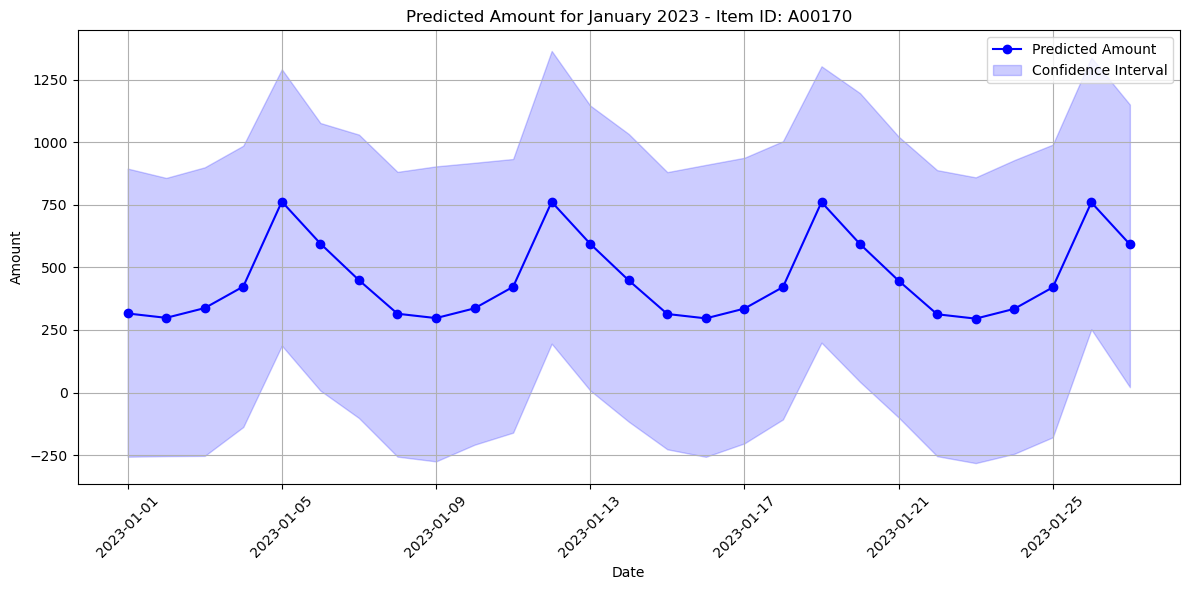

11:01:50 - cmdstanpy - INFO - Chain [1] start processing
11:01:50 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid SFG280:
           ds       yhat  yhat_lower  yhat_upper
34 2023-01-01  91.479026   58.845454  126.195893
35 2023-01-02  71.847245   41.109796  103.941832
36 2023-01-03  63.511471   30.466948   94.985089
37 2023-01-04  60.082061   26.794535   92.638240
38 2023-01-05  77.329175   41.233823  110.165155
39 2023-01-06  60.039023   26.990697   90.980618
40 2023-01-07  86.838446   53.122046  120.394697
41 2023-01-08  91.597564   59.421038  125.445782
42 2023-01-09  71.965784   36.610334  105.673929
43 2023-01-10  63.630010   30.057171   95.787173
44 2023-01-11  60.200600   27.583122   95.084916
45 2023-01-12  77.447713   43.473525  110.265472
46 2023-01-13  60.157562   26.391605   92.098384
47 2023-01-14  86.956985   54.428607  120.638658
48 2023-01-15  91.716103   58.722228  125.746466
49 2023-01-16  72.084322   37.293776  104.972059
50 2023-01-17  63.748548   32.962026   98.196261
51 2023-01-18  60.319138   28.573025   93.780495
52 2023-01-19  77.566252   44.804012  

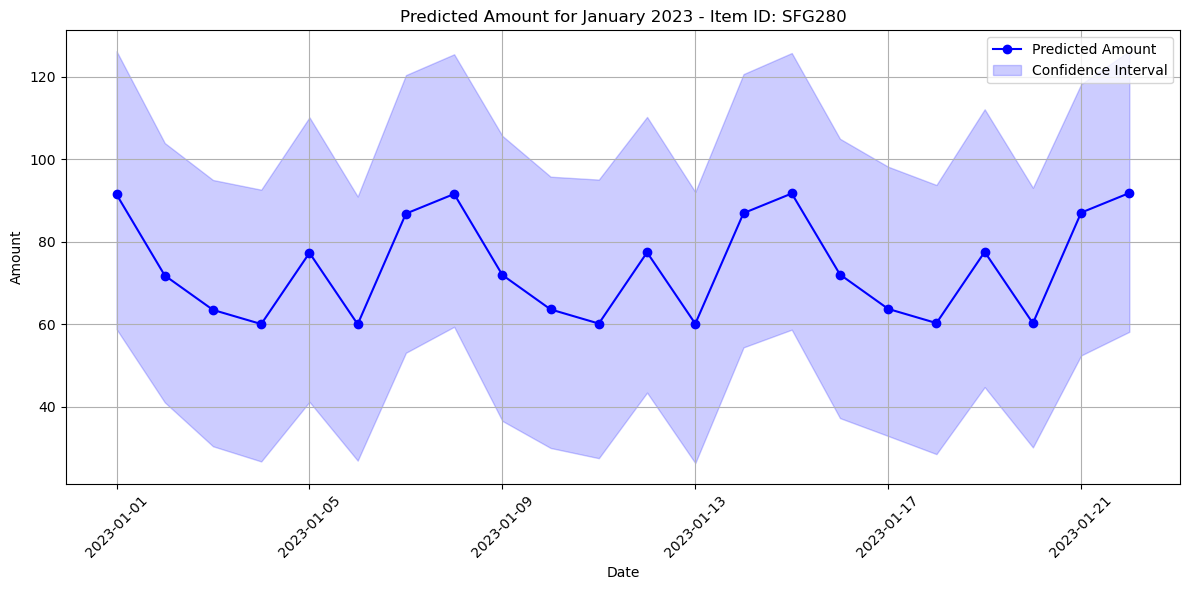

11:01:51 - cmdstanpy - INFO - Chain [1] start processing
11:01:51 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid SFG657:
            ds         yhat  yhat_lower   yhat_upper
187 2023-01-01   474.593959 -228.062310  1158.125568
188 2023-01-02   849.427446  177.238093  1501.872358
189 2023-01-03   648.678314  -76.230075  1351.047739
190 2023-01-04   767.641784   53.731312  1441.164575
191 2023-01-05  1140.868520  403.253868  1804.629119
192 2023-01-06  1161.346038  505.398352  1836.084289
193 2023-01-07   693.461198   -7.203132  1346.004557
194 2023-01-08   483.260616 -170.789503  1189.103705
195 2023-01-09   858.094103  150.999015  1565.615893
196 2023-01-10   657.344971    0.335940  1340.132980
197 2023-01-11   776.308441   79.303609  1482.275963
198 2023-01-12  1149.535177  505.126379  1854.976620
199 2023-01-13  1170.012695  494.957388  1853.672672
200 2023-01-14   702.127855   50.644384  1401.243380
201 2023-01-15   491.927272 -270.314811  1196.171655
202 2023-01-16   866.760759  117.637255  1576.743500
203 2023-01-17   666.011628   26.460953  1365.356562
204 2023-01-18 

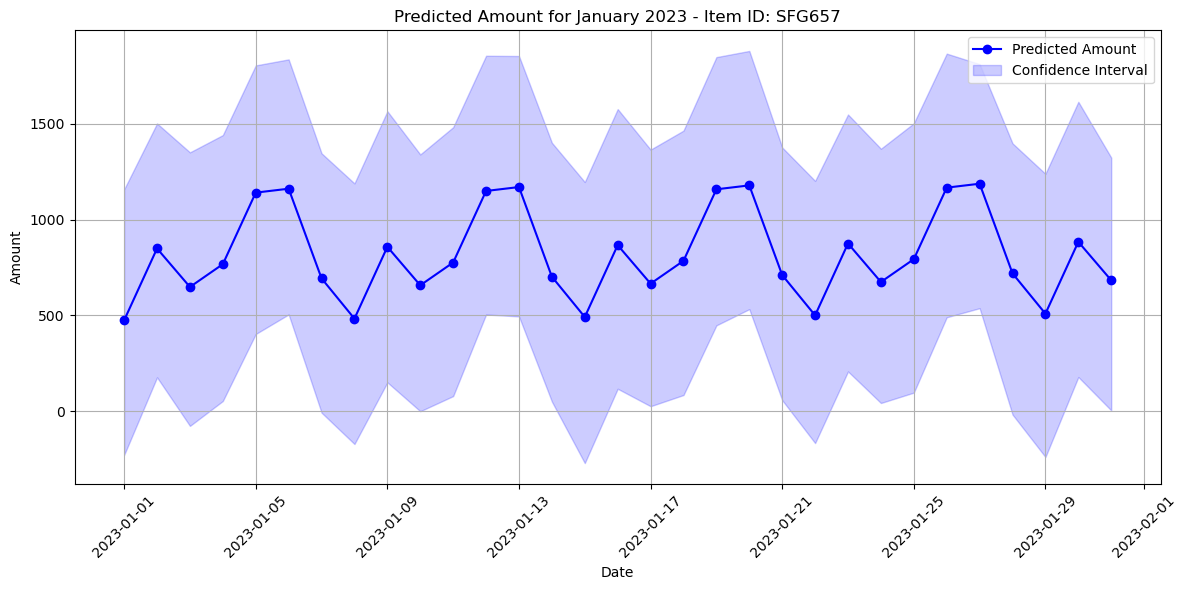

11:01:52 - cmdstanpy - INFO - Chain [1] start processing
11:01:52 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid R00275:
            ds         yhat  yhat_lower   yhat_upper
338 2023-01-01   696.717003   18.871136  1368.755369
339 2023-01-02  1255.465636  601.691074  1908.115896
340 2023-01-03   515.536139  -93.537389  1159.546032
341 2023-01-04   716.765581   59.506856  1372.349070
342 2023-01-05  1322.816001  705.874437  1973.557600
343 2023-01-06   766.352105  122.766885  1414.048599
344 2023-01-07   774.113438   95.006360  1424.898061
345 2023-01-08   700.174223   38.417161  1351.040434
346 2023-01-09  1258.922856  605.068934  1905.790502
347 2023-01-10   518.993359 -126.275639  1154.033160
348 2023-01-11   720.222801   84.132182  1365.845337
349 2023-01-12  1326.273221  701.523023  1982.495216
350 2023-01-13   769.809325  130.459685  1398.029606
351 2023-01-14   777.570658   95.074310  1419.435431
352 2023-01-15   703.631443   71.154735  1340.544614
353 2023-01-16  1262.380077  630.603724  1919.693802
354 2023-01-17   522.450579 -132.363444  1170.566599
355 2023-01-18 

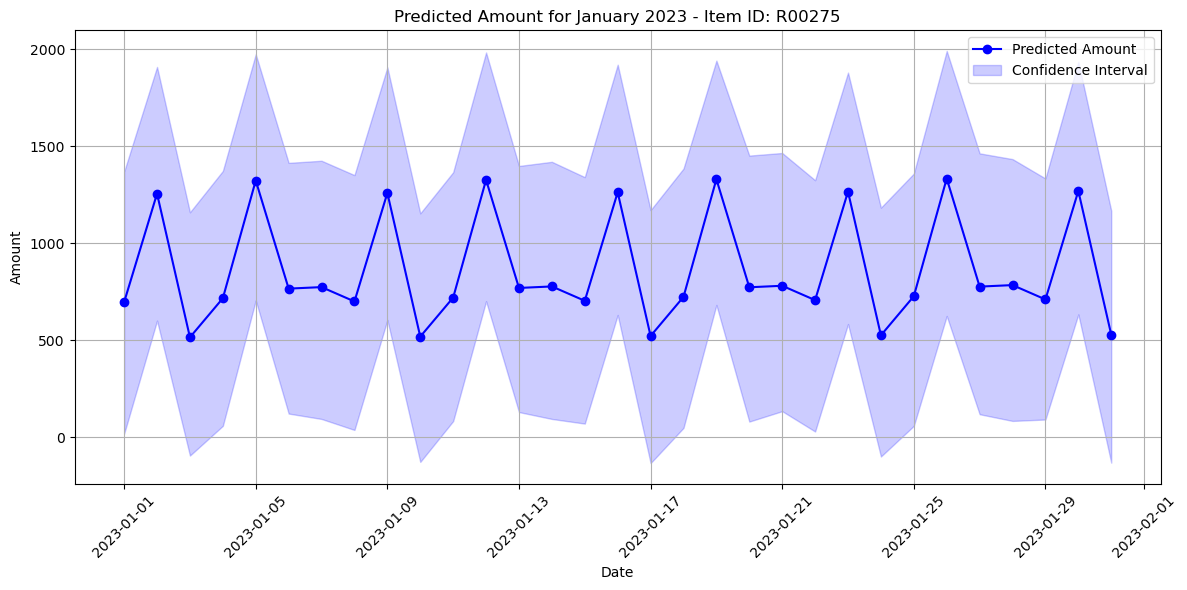

11:01:52 - cmdstanpy - INFO - Chain [1] start processing
11:01:53 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid R00292:
           ds       yhat  yhat_lower  yhat_upper
52 2023-01-01  32.853056   13.683399   52.515974
53 2023-01-02  34.201261   14.160268   53.764340
54 2023-01-03  27.359803    6.370047   46.800143
55 2023-01-04  63.070761   41.903869   82.883717
56 2023-01-05  35.638532   15.639159   54.689309
57 2023-01-06  44.486147   24.986653   64.386087
58 2023-01-07  27.840209    8.836335   47.196345
59 2023-01-08  33.082656   12.944480   53.008975
60 2023-01-09  34.430862   13.787124   55.008587
61 2023-01-10  27.589404   10.052939   46.901180
62 2023-01-11  63.300362   44.836287   82.642383
63 2023-01-12  35.868133   16.418034   54.218189
64 2023-01-13  44.715748   24.739720   64.553989
65 2023-01-14  28.069809    7.646372   47.651590
66 2023-01-15  33.312257   13.975823   52.291716
67 2023-01-16  34.660462   14.380343   56.048564
68 2023-01-17  27.819004    8.837371   48.811883
69 2023-01-18  63.529962   43.438735   81.727613
70 2023-01-19  36.097733   16.607263  

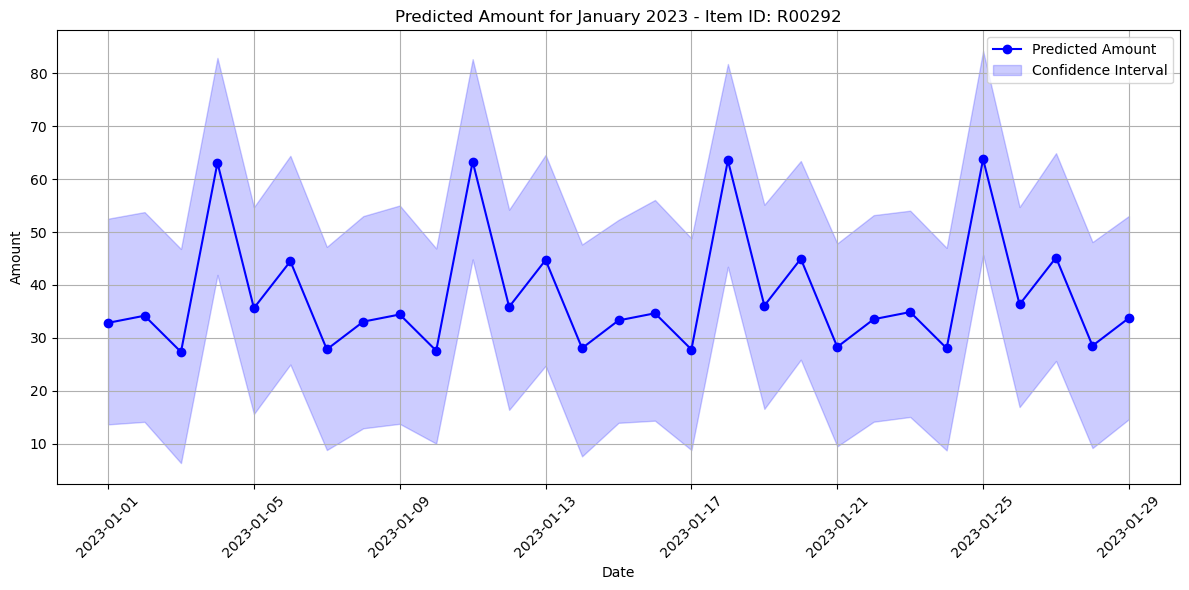

11:01:53 - cmdstanpy - INFO - Chain [1] start processing
11:01:53 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid SFG077:
            ds          yhat   yhat_lower    yhat_upper
332 2023-01-01   4674.531845  1826.466108   7599.281549
333 2023-01-02   7338.434714  4345.183212  10386.536456
334 2023-01-03   4108.667393   958.649151   7111.977518
335 2023-01-04   5311.965802  2259.058700   8258.647705
336 2023-01-05  12096.958602  9375.225053  15194.005386
337 2023-01-06   6737.863835  3483.941483   9999.981516
338 2023-01-07   6279.625332  3119.641054   9234.622359
339 2023-01-08   4788.053308  1757.694648   7777.914708
340 2023-01-09   7451.956177  4406.087538  10493.245756
341 2023-01-10   4222.188856  1354.804505   7323.831362
342 2023-01-11   5425.487265  2180.230830   8466.184803
343 2023-01-12  12210.480065  9446.628120  15205.671581
344 2023-01-13   6851.385298  3717.029907   9882.768368
345 2023-01-14   6393.146795  3183.426790   9229.162808
346 2023-01-15   4901.574771  1826.870634   7730.600581
347 2023-01-16   7565.477640  4600.933612  10642.577422
348 2023-01-17   

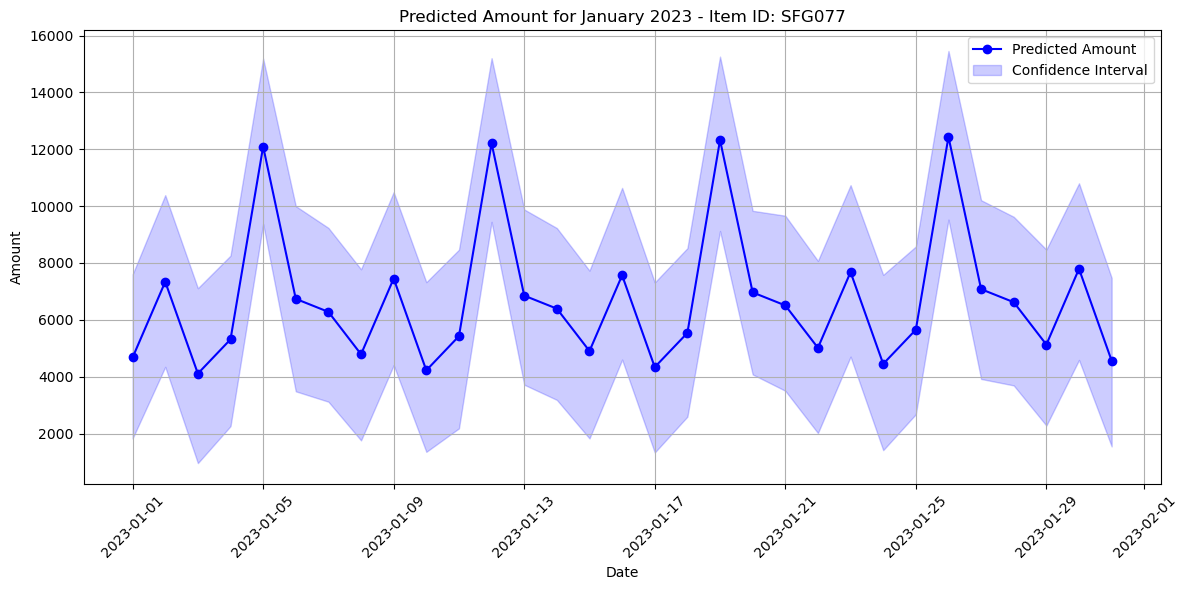

11:01:54 - cmdstanpy - INFO - Chain [1] start processing
11:01:54 - cmdstanpy - INFO - Chain [1] done processing


Predictions for itemid R00408:
            ds        yhat  yhat_lower   yhat_upper
323 2023-01-01  336.985457   52.724233   647.245388
324 2023-01-02  793.116642  498.304362  1109.732646
325 2023-01-03  407.923932  102.468596   701.528595
326 2023-01-04  421.413975  114.884190   719.053410
327 2023-01-05  962.293287  663.718099  1248.587529
328 2023-01-06  433.958384  130.748256   714.722436
329 2023-01-07  580.609468  264.465292   847.198216
330 2023-01-08  340.436808   36.003555   673.089970
331 2023-01-09  796.567993  511.237763  1096.917570
332 2023-01-10  411.375283  127.085743   716.883982
333 2023-01-11  424.865326  103.521445   725.793219
334 2023-01-12  965.744638  679.261943  1262.785592
335 2023-01-13  437.409734  166.927659   736.182969
336 2023-01-14  584.060819  299.769641   883.838733
337 2023-01-15  343.888158   43.773411   627.024599
338 2023-01-16  800.019343  479.138792  1097.235672
339 2023-01-17  414.826633  111.088508   708.499780
340 2023-01-18  428.316677  157.2

KeyboardInterrupt: 

In [14]:

# Iterate over each unique itemid in the dataset
for itemid in df['itemid'].unique():
    forecast_january_sales(df, itemid)